<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/RhythmicSpikeTrains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as st
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import scipy

Setting parameters

In [ ]:
t_stop = 0.1 #seconds
n_cells = 1000 
depth_of_mod = 0.3 # depth of modulation
f = 64 # frequency of oscillation (Gamma inhibition)


In [ ]:
mean_fr = 10 # mean firing rate
std_fr = 2 # std firing rate
a, b = (0 - mean_fr) / std_fr, (100 - mean_fr) / std_fr
print('a = ',a)
print('b = ',b)

a =  -5.0
b =  45.0


In [ ]:
d = partial(st.truncnorm.rvs, a=a, b=b, loc=mean_fr, scale=std_fr) 


# Creating a function to sample from a simulated population of cells with
# Truncated Normal distribution 
# mean firing rate = 10 
# Std of firing rate = 2
# bounds of -5.0 and 45

In [ ]:
frs = d(size=n_cells) # Calling st.truncnorm.rvs to sample from simulated cells 
                      # Sample size = n_cells = 1000
                    

t = np.arange(0,t_stop,0.001)
  # t is an array with values ranging from 0 to t_stop with increment 0.001
z = np.zeros((n_cells,t.shape[0]))
  # Z is a n_cells by t.shape[0] ([1000][100]) matrix of 0's
  
P = 0
  #Phase of sine wave

#Loop through each cell
for i in np.arange(0,n_cells):

    offset = frs[i] #Set 'offest' to the firing rate of cell i 
    
    A = offset/((1/depth_of_mod)-1) # Amplitude of sine wave (frs[i] / 2.333)

    z[i,:] = A*np.sin((2 * np.pi * f * t)+P) + offset 
        # Set the ith row of z to an array of firing rates for each time step 
        # [2 * np.pi * f * t] : an array of size t 
        # A*np.sin(  ) : take the sine of each value of the above array and multiply by size 


(0.0, 100.0)

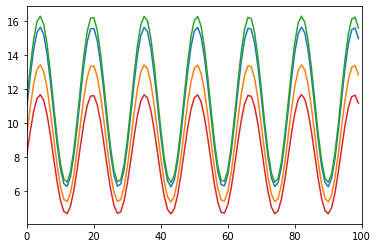

In [ ]:
plt.plot(z[0,:])
plt.plot(z[1,:])
plt.plot(z[2,:])
plt.plot(z[3,:])
plt.xlim(0,100)

Generate spikes with firing rates at each time step set bt z

In [ ]:

#---
#   The Poisson distribution is a discrete probability distribution that expresses the probability of a 
#   given number of events occurring in a fixed interval of time or space if these events occur with a 
#   known constant mean rate and independently of the time since the last event.  
#
#   An unmodulated cell has a constant mean firing rate, but as modulation causes the firing rate to
#   change over time we consider each small time interval (as determined by length of the timestep) 
#   where the firing rate is constant.
#
#   For a given cell i and a given timestep t we model how many times cell i fires during timestep t
#   using the poisson distribution with λ being set to the firing rate for cell i at time t adjusted 
#   to be the firing rate per milisecond (per timstep).
#
#   This results in many timesteps that do not have spikes - but apoximatly 10 spikes every 1000 timesteps
# 


simSpks = []

#Loop through each cell

for i in np.arange(0,n_cells):

    r = z[i,:]

    r[r<0] = 0 #Can't have negative firing rates.


    numbPoints = scipy.stats.poisson(r/1000).rvs() 
      # numbPoints is an array of poisson random varibles with length of array = # of time steps
      # Each random variable is a poisson disribution that models the number of spikes that occur for cell i during each interval of each timestep
      # At each timestep t, cell i has a new freqency value given by Z[i,t]
        # The poisson random variable that models the number of spikes that occur in cell i at timestep t has the parameter λ = Z[i,t]/1000

    simSpks.append(np.where(numbPoints>0)[0]) 
      # If a spike occurs for cell i at timestep t, append timestep t to simSpks
      # i.e. if the poisson random variable for cell i at timestep t takes a value of 1 then 't' will be appended to simSpks

Ploting

Text(0, 0.5, 'node ID')

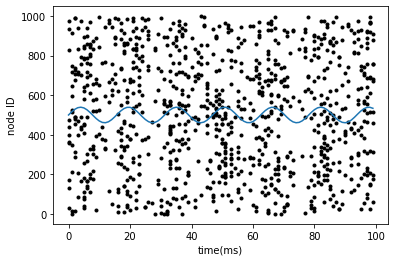

In [ ]:
for i in np.arange(0,z.shape[0]):
    plt.plot(simSpks[i],np.ones((simSpks[i].shape[0]))*i,'k.')
plt.plot(10*A*np.sin((2 * np.pi * f * t)+P)+500)
plt.xlabel('time(ms)')
plt.ylabel('node ID')

In [ ]:


totalSpks = 0
for i in np.arange(0,n_cells):
  numSpks = np.count_nonzero(simSpks[i])
  totalSpks += numSpks

avg = (totalSpks/1000)* (1/t_stop)
print(avg)


#We verify that the arverage firing rate is unchanged after modulation

9.53
